<a href="https://colab.research.google.com/github/yfhkucing/regression_bms/blob/master/Vx_Vy_with_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import pandas as pd

In [2]:
feature = pd.read_excel('/content/input_big_4.xlsx',sheet_name='Sheet2')
label = pd.read_excel('/content/data_big_4.xlsx', sheet_name='Sheet2')

In [3]:
import joblib
import numpy as np
import pandas as pd

In [4]:
! unzip /content/models.zip

Archive:  /content/models.zip
   creating: content/models/
  inflating: content/models/model 1  
  inflating: content/models/model 5  
  inflating: content/models/model 2  
  inflating: content/models/model 6  
  inflating: content/models/model 22  
  inflating: content/models/model 13  
  inflating: content/models/model 9  
  inflating: content/models/model 25  
  inflating: content/models/model 16  
  inflating: content/models/model 23  
  inflating: content/models/model 19  
  inflating: content/models/model 28  
  inflating: content/models/model 8  
  inflating: content/models/model 0  
  inflating: content/models/model 11  
  inflating: content/models/model 15  
  inflating: content/models/model 7  
  inflating: content/models/model 10  
  inflating: content/models/model 3  
  inflating: content/models/model 24  
  inflating: content/models/model 20  
  inflating: content/models/model 14  
  inflating: content/models/model 29  
  inflating: content/models/model 12  
  inflating: c

In [27]:
def norm(df):
  df=(df-df.min())/(df.max()-df.min())
  return df

In [28]:
array_x = []

for i in range(30):
  frame= feature[i::30]
  frame= norm(frame)
  array_x.append(frame)

In [29]:
array_y = []

for i in range(30):
  frame= label[i::30]
  frame = frame.drop(['koor_x','koor_y','Temp'],axis=1)
  frame = norm(frame)
  array_y.append(frame)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

skor_r2=[]
mae_=[]
rmse = []
y_predict = []
for i in range(30):
  x = array_x[i]
  y = array_y[i]
  model = joblib.load(f'/content/content/models/model {i}')
  y_pred = model.predict(x)
  Skor_r2 = r2(y,y_pred)
  RMSE = mse(y,y_pred,squared=False)
  MAE = mae(y,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

In [31]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y = np.array(array_y)

In [32]:
r2_matrix = skor_r2.reshape(5,6)
rmse_matrix = rmse.reshape(5,6)
mae_matrix = mae_.reshape(5,6)

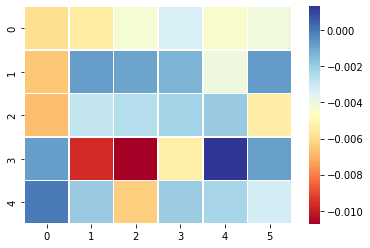

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

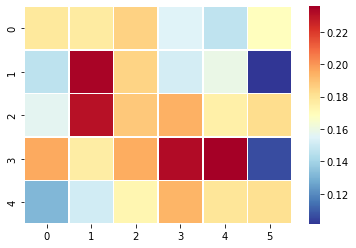

In [34]:
bx = sns.heatmap(rmse_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

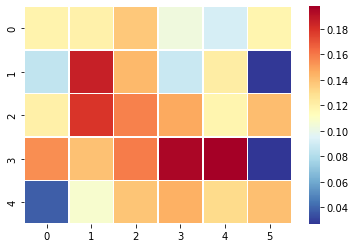

In [35]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [54]:
scenarios = 191   #0-191
indexing = 0    #0-1

In [55]:
a = y[(...,scenarios,indexing)]
b = y_predict[(...,scenarios,indexing)]
#a = np.array(a)
#b = np.array(b)
print('reshaped')

reshaped


In [56]:
df_koor_x = pd.DataFrame(label['koor_x'])
df_koor_y = pd.DataFrame(label['koor_y'])
df_koor = df_koor_x.join(df_koor_y)

In [57]:
import plotly.graph_objects as go
from plotly.figure_factory import create_quiver

In [58]:
def kec_angin(y,scenarios):
  df_x = pd.DataFrame(y[...,scenarios,0])
  df_y = pd.DataFrame(y[...,scenarios,1])
  df_y.rename(columns={0:1},inplace=True)
  df_x = df_x.join(df_y)
  df_x = df_x.join(df_koor)
  df_x.rename(columns={0:'Vx',1:'Vy',},inplace=True)
  return df_x

In [59]:
def tampilan_vektor(Y,scale,arrow):
  x = Y['koor_x']
  y = Y['koor_y']
  u = Y['Vx']
  v = Y['Vy']

  fig = create_quiver(x,y,u,v, scale=scale, arrow_scale=arrow)
  
  fig.show()

In [60]:
angin_test = kec_angin(y,scenarios)
angin_pred = kec_angin(y_predict,scenarios)

In [61]:
tampilan_vektor(angin_test,25,0.1)

In [62]:
tampilan_vektor(angin_pred,25,0.1)